# **Read the DataSet**

In [1]:
import pandas as pd

# Load the uploaded DDoS CSV file
ddos_df = pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

# Basic info and first few rows
ddos_df.head()




,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
ddos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [3]:

# Check class distribution
class_distribution = ddos_df[' Label'].value_counts()

In [4]:
class_distribution

,count
Label,
DDoS,128027
BENIGN,97718


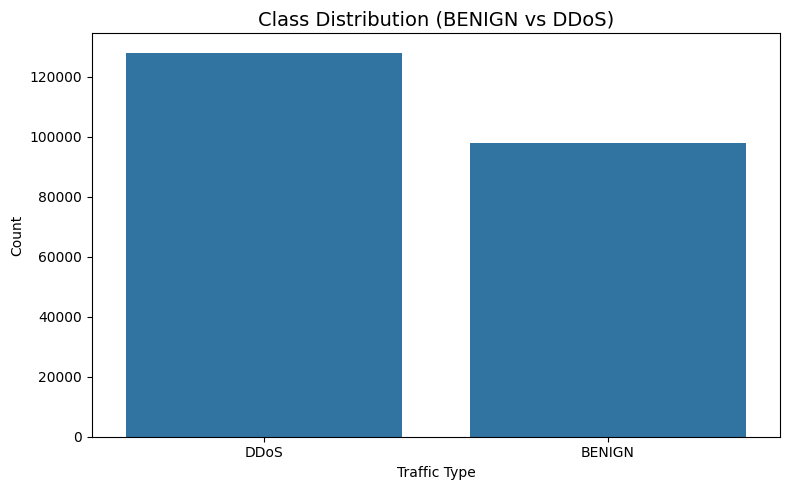

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


#  Remove columns with all identical values or high NaN
nunique = ddos_df.nunique()
constant_columns = nunique[nunique <= 1].index.tolist()
ddos_df_cleaned = ddos_df.drop(columns=constant_columns)

# Clean column names (remove leading/trailing spaces)
ddos_df_cleaned.columns = ddos_df_cleaned.columns.str.strip()

#  Check updated class distribution after cleanup
class_dist_clean = ddos_df_cleaned['Label'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=ddos_df_cleaned, x='Label', order=class_dist_clean.index)
plt.title("Class Distribution (BENIGN vs DDoS)", fontsize=14)
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


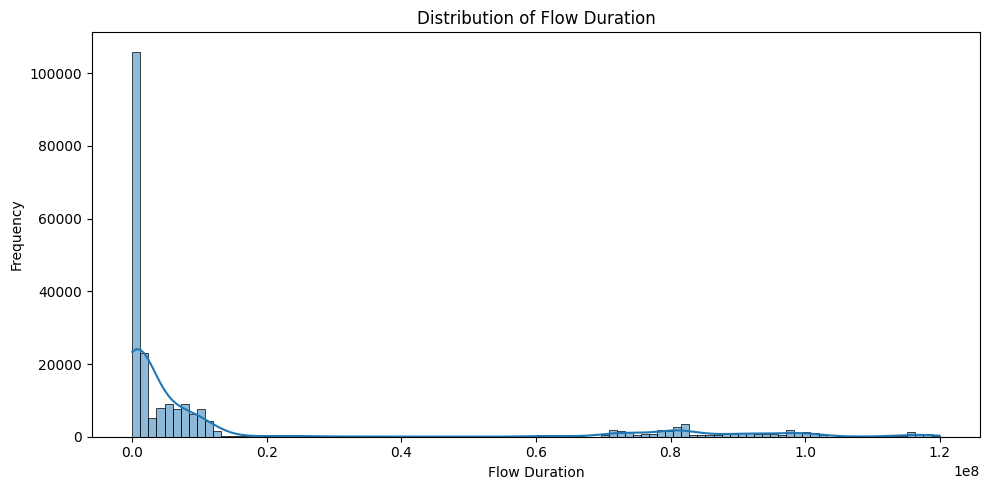

In [6]:
#  Distribution of Flow Duration
plt.figure(figsize=(10, 5))
sns.histplot(data=ddos_df_cleaned, x='Flow Duration', bins=100, kde=True)
plt.title("Distribution of Flow Duration")
plt.xlabel("Flow Duration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

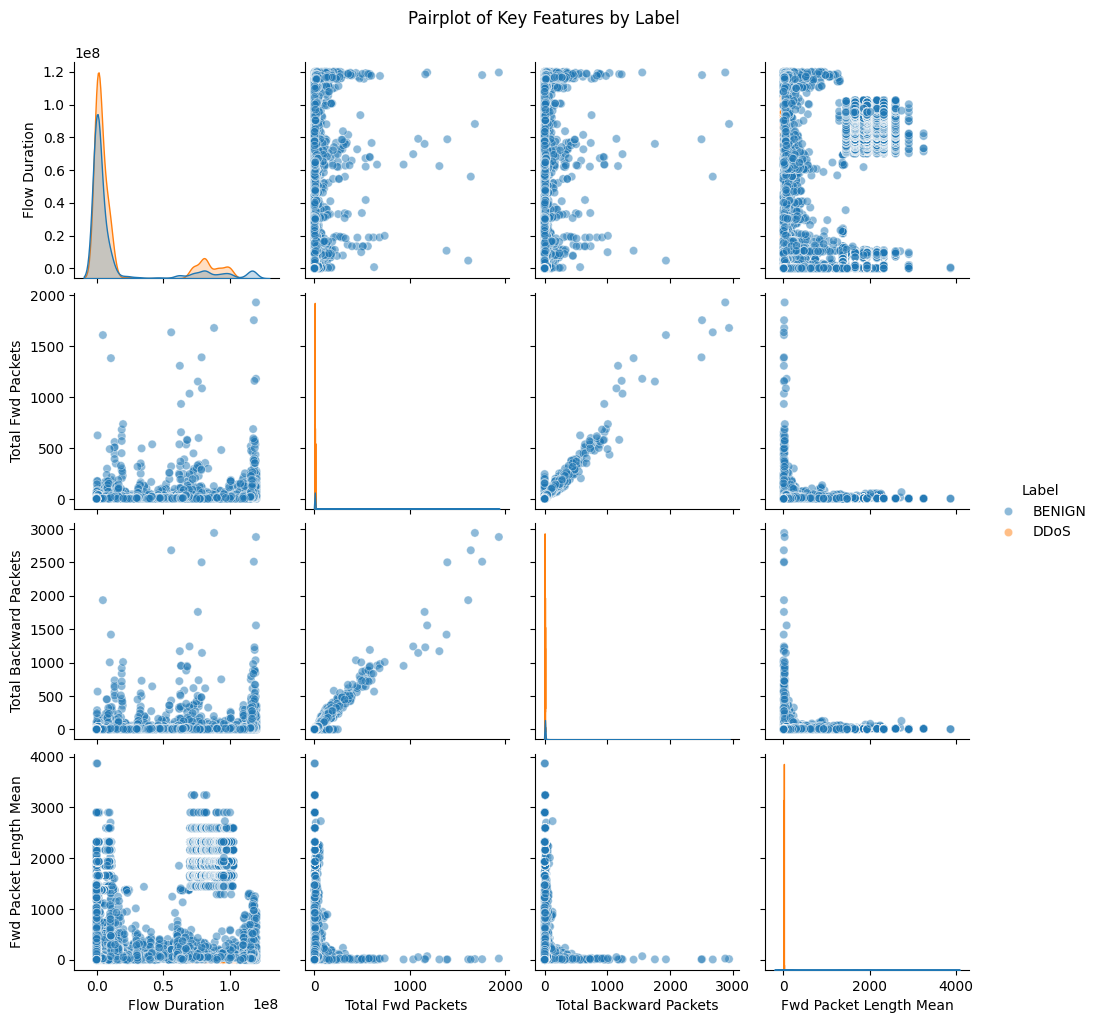

In [7]:
# 2. Pairplot of selected features grouped by Label
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Mean', 'Label']
pairplot_df = ddos_df_cleaned[selected_features].copy()
pairplot_df['Label'] = pairplot_df['Label'].astype('category')

sns.pairplot(pairplot_df, hue='Label', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Key Features by Label", y=1.02)
plt.show()

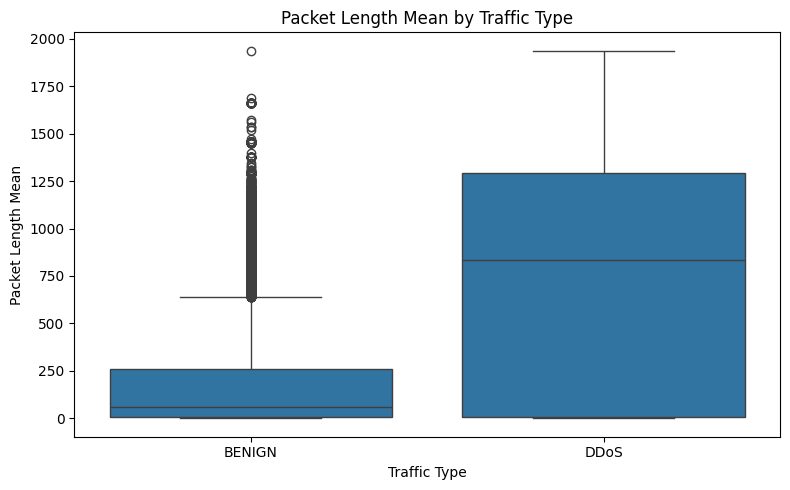

In [8]:



#  Boxplot for Packet Length Mean by Label
plt.figure(figsize=(8, 5))
sns.boxplot(data=ddos_df_cleaned, x='Label', y='Packet Length Mean')
plt.title("Packet Length Mean by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Packet Length Mean")
plt.tight_layout()
plt.show()


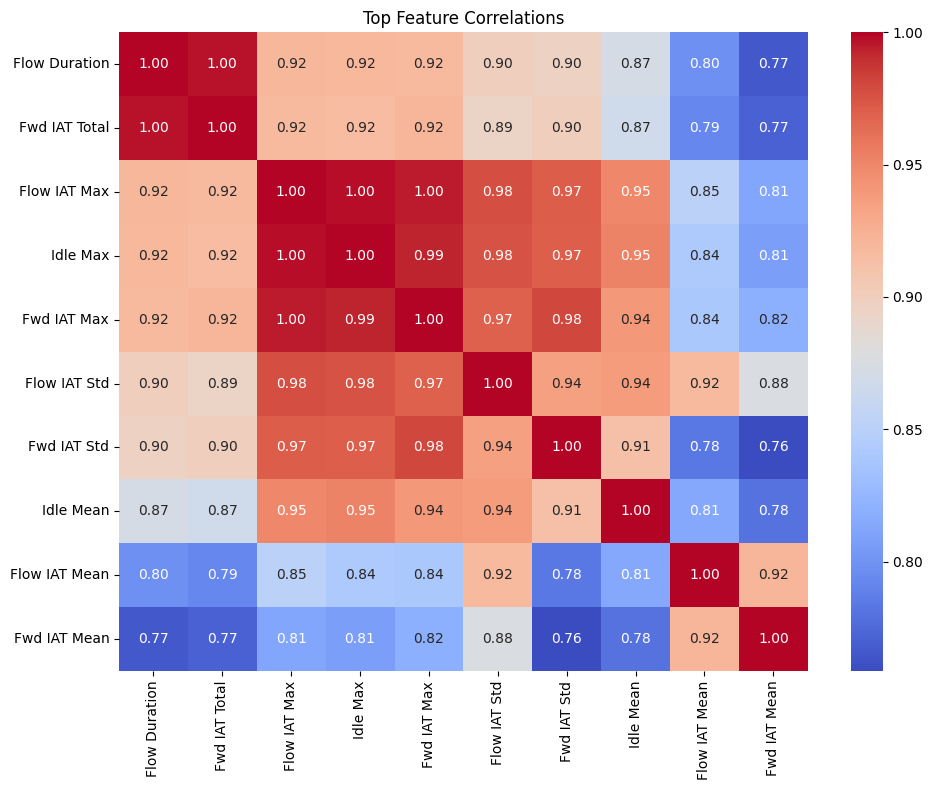

In [9]:
#  Generate correlation heatmap (top correlated features only)
numeric_df = ddos_df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
top_corr = corr_matrix.abs().nlargest(10, 'Flow Duration')['Flow Duration'].index

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr, top_corr], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top Feature Correlations")
plt.tight_layout()
plt.show()

# **Model Building**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## **Label Encoding**

In [14]:

#  Encode labels
ddos_df[' Label']= ddos_df[' Label'].map({'BENIGN': 0, 'DDoS': 1})

## **Remove(DROP) infinity value from the datase**t

In [16]:
#  Separate features and target
X = ddos_df.drop(columns=[' Label'])
y =ddos_df[' Label']


In [17]:
import numpy as np

# Replace inf/-inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
X.dropna(inplace=True)
y = y[X.index]  # Align target with cleaned features

## **Feature Scale and Data Split into train and test**

In [18]:

#  Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


# **Train the Machine Learning Model**

In [19]:




#  Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Step 6: Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


({'0': {'precision': 0.9998635231498857,
   'recall': 0.999965877294752,
   'f1-score': 0.9999146976030027,
   'support': 29306.0},
  '1': {'precision': 0.9999739617237339,
   'recall': 0.9998958550302021,
   'f1-score': 0.9999349068517048,
   'support': 38408.0},
  'accuracy': 0.9999261600259917,
  'macro avg': {'precision': 0.9999187424368098,
   'recall': 0.9999308661624771,
   'f1-score': 0.9999248022273537,
   'support': 67714.0},
  'weighted avg': {'precision': 0.9999261649188605,
   'recall': 0.9999261600259917,
   'f1-score': 0.9999261604736669,
   'support': 67714.0}},
 array([[29305,     1],
        [    4, 38404]]))

<Figure size 600x400 with 0 Axes>

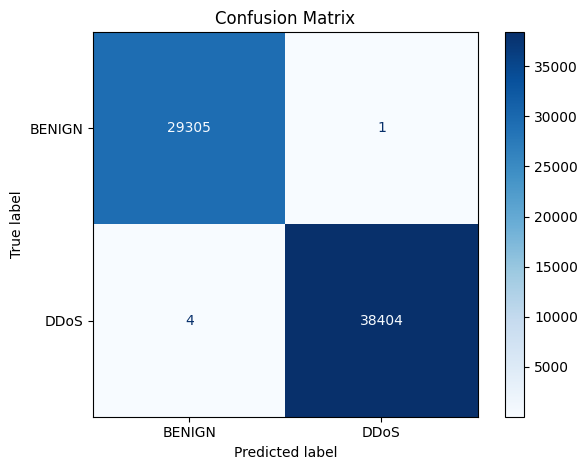

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['BENIGN', 'DDoS'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



In [25]:

# Print metrics with clear text formatting
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

Accuracy  : 0.9999
Precision : 1.0000
Recall    : 0.9999
F1 Score  : 0.9999
